In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

import bitcoin.db as db
df = db.get_all_data_from_pas(pas=30)
df.describe()

2018-03-27 21:14:08,492 root         INFO     Load data from SQL.


,open,tw_sentiment,reddit_sentiment,google_sentiment,close,time,up
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000
mean,7249.275666,0.051522,0.056214,0.020624,7246.553744,1.521204e+09,0.489489
std,691.043107,0.069661,0.034056,0.058284,688.722320,5.469349e+05,0.500140
min,5955.390000,-0.126533,-0.027392,-0.106974,5974.960000,1.520272e+09,0.000000
25%,6803.165000,0.012239,0.031353,-0.016191,6801.745000,1.520722e+09,0.000000
50%,7123.900000,0.040651,0.055712,0.015985,7121.990000,1.521184e+09,0.000000
75%,7509.305000,0.074939,0.080811,0.053278,7500.000000,1.521684e+09,1.000000
max,9398.740000,0.566164,0.168269,0.211511,9398.740000,1.522136e+09,1.000000


In [2]:
from bitcoin.train import train
columns = ['open', 'google_sentiment']
history = train(df[columns].values, df[['close']].values)

2018-03-27 21:14:10,717 root         INFO     Train Model
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            162400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

Epoch 31/175
699/699 [==============================] - 0s 111us/step - loss: 40.7172 - mean_squared_error: 0.1488 - mean_absolute_error: 0.2958 - val_loss: 38.6917 - val_mean_squared_error: 0.0210 - val_mean_absolute_error: 0.1118
Epoch 32/175
699/699 [==============================] - 0s 112us/step - loss: 38.8676 - mean_squared_error: 0.1415 - mean_absolute_error: 0.2877 - val_loss: 36.9306 - val_mean_squared_error: 0.0201 - val_mean_absolute_error: 0.1093
Epoch 33/175
699/699 [==============================] - 0s 117us/step - loss: 37.0994 - mean_squared_error: 0.1323 - mean_absolute_error: 0.2781 - val_loss: 35.2334 - val_mean_squared_error: 0.0203 - val_mean_absolute_error: 0.1093
Epoch 34/175
699/699 [==============================] - 0s 114us/step - loss: 35.3909 - mean_squared_error: 0.1209 - mean_absolute_error: 0.2669 - val_loss: 33.5974 - val_mean_squared_error: 0.0215 - val_mean_absolute_error: 0.1124
Epoch 35/175
699/699 [==============================] - 0s 112us/step - 

Epoch 67/175
699/699 [==============================] - 0s 131us/step - loss: 6.0781 - mean_squared_error: 0.0064 - mean_absolute_error: 0.0629 - val_loss: 5.7021 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0241
Epoch 68/175
699/699 [==============================] - 0s 124us/step - loss: 5.7370 - mean_squared_error: 0.0057 - mean_absolute_error: 0.0590 - val_loss: 5.3864 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0253
Epoch 69/175
699/699 [==============================] - 0s 118us/step - loss: 5.4279 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0667 - val_loss: 5.0870 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0254
Epoch 70/175
699/699 [==============================] - 0s 122us/step - loss: 5.1233 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0618 - val_loss: 4.8083 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0248
Epoch 71/175
699/699 [==============================] - 0s 123us/step - loss: 4.

Epoch 103/175
699/699 [==============================] - 0s 129us/step - loss: 1.0865 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0478 - val_loss: 1.0279 - val_mean_squared_error: 7.4694e-04 - val_mean_absolute_error: 0.0207
Epoch 104/175
699/699 [==============================] - 0s 128us/step - loss: 1.0539 - mean_squared_error: 0.0037 - mean_absolute_error: 0.0467 - val_loss: 0.9908 - val_mean_squared_error: 6.6400e-04 - val_mean_absolute_error: 0.0188
Epoch 105/175
699/699 [==============================] - 0s 122us/step - loss: 1.0188 - mean_squared_error: 0.0037 - mean_absolute_error: 0.0468 - val_loss: 0.9584 - val_mean_squared_error: 7.6369e-04 - val_mean_absolute_error: 0.0199
Epoch 106/175
699/699 [==============================] - 0s 123us/step - loss: 0.9813 - mean_squared_error: 0.0035 - mean_absolute_error: 0.0428 - val_loss: 0.9386 - val_mean_squared_error: 9.4475e-04 - val_mean_absolute_error: 0.0231
Epoch 107/175
699/699 [==============================] - 0s 

Epoch 138/175
699/699 [==============================] - 0s 126us/step - loss: 0.6697 - mean_squared_error: 0.0034 - mean_absolute_error: 0.0447 - val_loss: 0.6457 - val_mean_squared_error: 6.2970e-04 - val_mean_absolute_error: 0.0176
Epoch 139/175
699/699 [==============================] - 0s 125us/step - loss: 0.6698 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0418 - val_loss: 0.6386 - val_mean_squared_error: 6.4579e-04 - val_mean_absolute_error: 0.0183
Epoch 140/175
699/699 [==============================] - 0s 116us/step - loss: 0.6638 - mean_squared_error: 0.0033 - mean_absolute_error: 0.0434 - val_loss: 0.6348 - val_mean_squared_error: 6.2358e-04 - val_mean_absolute_error: 0.0174
Epoch 141/175
699/699 [==============================] - 0s 113us/step - loss: 0.6602 - mean_squared_error: 0.0033 - mean_absolute_error: 0.0428 - val_loss: 0.6361 - val_mean_squared_error: 6.6372e-04 - val_mean_absolute_error: 0.0180
Epoch 142/175
699/699 [==============================] - 0s 

Epoch 173/175
699/699 [==============================] - 0s 135us/step - loss: 0.6415 - mean_squared_error: 0.0033 - mean_absolute_error: 0.0425 - val_loss: 0.6223 - val_mean_squared_error: 7.7222e-04 - val_mean_absolute_error: 0.0201
Epoch 174/175
699/699 [==============================] - 0s 142us/step - loss: 0.6442 - mean_squared_error: 0.0031 - mean_absolute_error: 0.0419 - val_loss: 0.6235 - val_mean_squared_error: 6.3189e-04 - val_mean_absolute_error: 0.0177
Epoch 175/175
699/699 [==============================] - 0s 138us/step - loss: 0.6485 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0426 - val_loss: 0.6230 - val_mean_squared_error: 6.3291e-04 - val_mean_absolute_error: 0.0179


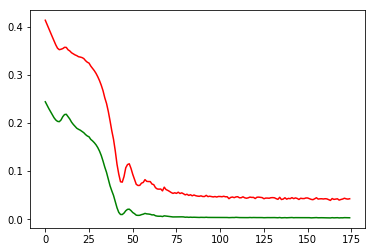

In [3]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error'], 'g')

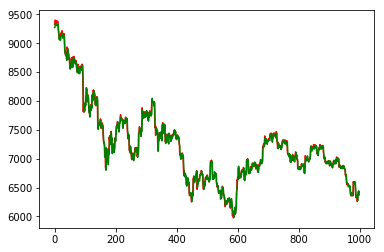

In [4]:
from keras.models import load_model
from sklearn.externals import joblib
import numpy as np

model = load_model('./model-BTC-EUR.h5')
scaler_x = joblib.load('model-scaler-x-BTC-EUR.pkl')
scaler_y = joblib.load('model-scaler-y-BTC-EUR.pkl')

X = np.array(df[['open', 'google_sentiment']])
X = scaler_x.transform(X)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

yp = model.predict(X)
yp = scaler_y.inverse_transform(yp)

plt.plot(df['close'], 'r')
plt.plot(yp, 'g')

In [16]:
import pandas as pd

df_computed = pd.DataFrame(columns=['real', 'predicted', 'diff'])
df_computed['real'] = df['close']
df_computed['predicted'] = yp
df_computed['diff'] = df['close'] - df_computed['predicted']

df_computed.describe()

,real,predicted,diff
count,999.000000,999.000000,999.000000
mean,7246.553744,7239.382812,7.169347
std,688.722320,682.018616,66.779236
min,5974.960000,5987.658691,-371.787500
25%,6801.745000,6795.978271,-22.708887
50%,7121.990000,7112.272461,10.577383
75%,7500.000000,7496.315918,39.021738
max,9398.740000,9344.688477,315.123789


In [24]:
from bitcoin.validation import test_money

test_money(columns, df, regul=0)

2018-03-27 21:26:56,066 root         INFO     BUY
2018-03-27 21:26:56,069 root         INFO     SELL
2018-03-27 21:26:56,074 root         INFO     BUY
2018-03-27 21:26:56,080 root         INFO     SELL
2018-03-27 21:26:56,091 root         INFO     BUY
2018-03-27 21:26:56,095 root         INFO     SELL
2018-03-27 21:26:56,103 root         INFO     BUY
2018-03-27 21:26:56,111 root         INFO     SELL
2018-03-27 21:26:56,121 root         INFO     BUY
2018-03-27 21:26:56,135 root         INFO     SELL
2018-03-27 21:26:56,142 root         INFO     BUY
2018-03-27 21:26:56,146 root         INFO     SELL
2018-03-27 21:26:56,150 root         INFO     BUY
2018-03-27 21:26:56,154 root         INFO     SELL
2018-03-27 21:26:56,167 root         INFO     BUY
2018-03-27 21:26:56,173 root         INFO     SELL
2018-03-27 21:26:56,198 root         INFO     BUY
2018-03-27 21:26:56,201 root         INFO     SELL
2018-03-27 21:26:56,209 root         INFO     BUY
2018-03-27 21:26:56,214 root         INFO